In [1]:
import numpy as np
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import matplotlib.pyplot as plt
%matplotlib inline

E:\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

In [3]:
train_batchs = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dogs','cats'], batch_size=10)
valid_batchs = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dogs','cats'], batch_size=4)
test_batchs = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dogs','cats'], batch_size=10)

Found 42 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [4]:
# taken from: https://github.com/smileservices/keras_utils/blob/master/utils.py

# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batchs)

E:\Anaconda3\lib\site-packages\matplotlib\text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


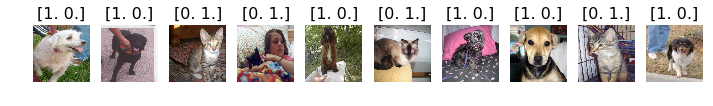

In [6]:
plots (imgs, titles=labels)

# Building and Training CNN

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2, activation='softmax')
])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit_generator(train_batchs, steps_per_epoch=4,
                   validation_data=valid_batchs, validation_steps=4, epochs=10, verbose=2)

Epoch 1/10
 - 4s - loss: 8.6060 - acc: 0.4475 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/10
 - 0s - loss: 8.4821 - acc: 0.4738 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
 - 1s - loss: 10.1947 - acc: 0.3675 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10
 - 0s - loss: 8.5023 - acc: 0.4725 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/10
 - 1s - loss: 8.9254 - acc: 0.4462 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/10
 - 0s - loss: 8.8650 - acc: 0.4500 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 9/10
 - 1s - loss: 7.6024 - acc: 0.5283 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 10/10
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


# Predict

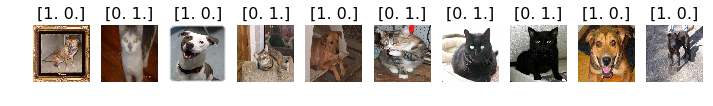

In [11]:
test_imgs, test_labels = next(test_batchs)
plots(test_imgs, titles=test_labels)

In [12]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 1., 0., 1., 0., 0., 0., 1., 1.], dtype=float32)

In [20]:
prediction = model.predict_generator(test_batchs, steps=1, verbose=2)

In [21]:
prediction

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [23]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(test_labels, prediction[:,0])

In [24]:
# taken from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[5 0]
 [5 0]]


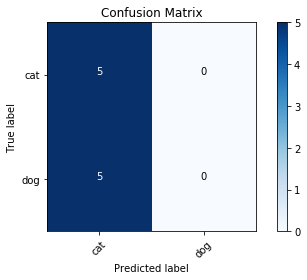

In [25]:
cm_class_labels = ['cat', 'dog']
plot_confusion_matrix(cm, cm_class_labels, title='Confusion Matrix')

# Build Fine-tuned VGG16 Model

In [27]:
vgg16_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 1591s 3us/step


In [28]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [31]:
type(vgg16_model)

keras.engine.training.Model

In [33]:
from tqdm import tqdm
model = Sequential()
for layer in tqdm(vgg16_model.layers):
    model.add(layer)

100%|█████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 243.99it/s]


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [35]:
model.layers.pop()

In [40]:
for layer in model.layers:
    layer.trainable = False

In [41]:
model.add(Dense(2, activation='softmax'))

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

# Training the Fine-tuned Model

In [51]:
model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
model.fit_generator(train_batchs, steps_per_epoch=4, validation_data=valid_batchs, validation_steps=4,
                   epochs=5, verbose=2)

Epoch 1/5
 - 2s - loss: 0.6147 - acc: 1.0000 - val_loss: 0.6410 - val_acc: 0.8750
Epoch 2/5
 - 1s - loss: 0.6046 - acc: 0.9737 - val_loss: 0.6399 - val_acc: 0.8750
Epoch 3/5
 - 1s - loss: 0.6002 - acc: 0.9737 - val_loss: 0.6387 - val_acc: 0.8750
Epoch 4/5
 - 1s - loss: 0.6095 - acc: 0.9737 - val_loss: 0.6375 - val_acc: 0.8750
Epoch 5/5
 - 1s - loss: 0.6042 - acc: 0.9750 - val_loss: 0.6363 - val_acc: 0.8750


# Predicting using the Fine-tuned model

E:\Anaconda3\lib\site-packages\matplotlib\text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


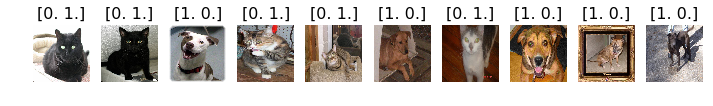

In [56]:
test_imgs, test_labels = next(test_batchs)
plots(test_imgs, titles=test_labels)

In [57]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)

In [60]:
prediction = model.predict_generator(test_batchs, steps=1, verbose=0)
prediction

array([[0.47124252, 0.5287575 ],
       [0.44586265, 0.55413735],
       [0.5420476 , 0.45795232],
       [0.51543754, 0.4845625 ],
       [0.46769506, 0.5323049 ],
       [0.5633077 , 0.43669227],
       [0.44053778, 0.55946225],
       [0.4903534 , 0.5096466 ],
       [0.5463481 , 0.4536519 ],
       [0.43633905, 0.563661  ]], dtype=float32)

In [61]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(test_labels, np.round(prediction[:,0]))

Confusion matrix, without normalization
[[4 1]
 [2 3]]


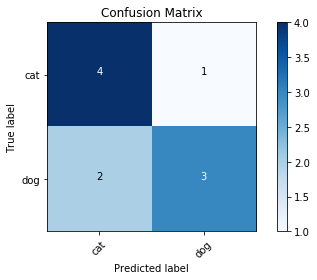

In [62]:
cm_class_labels = ['cat', 'dog']
plot_confusion_matrix(cm, cm_class_labels, title='Confusion Matrix')